**Monthly milk production: pounds per cow. Jan 1962 - Dec 1975**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Activation,Dense,Dropout
%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Kishore\Machine Learning\Milk Production prediction\monthly-milk-production.csv",index_col='Month')
df.index = pd.to_datetime(df.index)
df

,Milk Production
Month,
1962-01-01 01:00:00,589.0
1962-02-01 01:00:00,561.0
1962-03-01 01:00:00,640.0
1962-04-01 01:00:00,656.0
1962-05-01 01:00:00,727.0
...,...
1975-08-01 01:00:00,858.0
1975-09-01 01:00:00,817.0
1975-10-01 01:00:00,827.0


<Axes: xlabel='Month'>

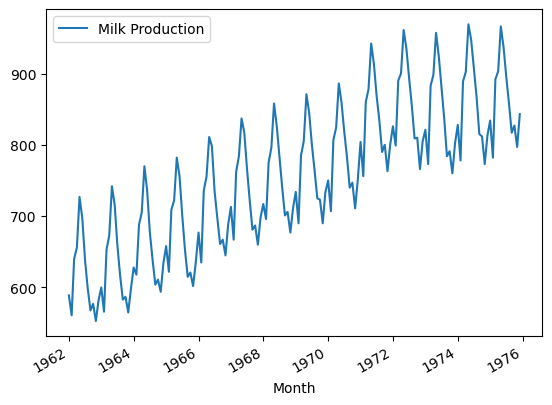

In [4]:
df.plot()

In [5]:
scaler = MinMaxScaler()

array = []
train_data = []
train_labels = []

for i in range(len(df)):
    array.append(df.iloc[i]['Milk Production'])

array = np.array(array).reshape(-1,1)
array = scaler.fit_transform(array)
array

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231],
       [0.        ],
       [0.06971154],
       [0.11298077],
       [0.03125   ],
       [0.24038462],
       [0.28846154],
       [0.45432692],
       [0.39182692],
       [0.25721154],
       [0.15384615],
       [0.07211538],
       [0.08173077],
       [0.02884615],
       [0.10817308],
       [0.18028846],
       [0.15625   ],
       [0.32451923],
       [0.36538462],
       [0.52163462],
       [0.43990385],
       [0.30048077],
       [0.20673077],
       [0.12259615],
       [0.13942308],
       [0.09855769],
       [0.19471154],
       [0.25240385],
       [0.16586538],
       [0.375     ],
       [0.40625   ],
       [0.55048077],
       [0.48798077],
       [0.35817308],
       [0.24038462],
       [0.14903846],
       [0.16346154],
       [0.11778846],
       [0.197

In [6]:
k = 0
for i in range(len(array)):
    try:
        train_data.append(array[12*k:12*(k+1)])
        train_labels.append(array[12*(k+1)])
        k+=1
    except:
        break

In [7]:
train_data = np.squeeze(train_data)
train_data.shape

(14, 12)

In [8]:
train_labels = np.array(train_labels)
train_labels.shape

(13, 1)

In [9]:
train_data = train_data[:len(train_labels)]
train_data = np.expand_dims(train_data,1)
train_data.shape

(13, 1, 12)

In [10]:
train_data[1]

array([[0.11298077, 0.03125   , 0.24038462, 0.28846154, 0.45432692,
        0.39182692, 0.25721154, 0.15384615, 0.07211538, 0.08173077,
        0.02884615, 0.10817308]])

In [11]:
train_labels[1]

array([0.18028846])

In [12]:
model = Sequential()

model.add(LSTM(250,input_shape=(1,12)))
model.add(Dropout(0.5))


model.add(Dense(250,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(12,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='relu'))

model.compile(loss='mean_squared_error',optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 250)               263000    
                                                                 
 dropout (Dropout)           (None, 250)               0         
                                                                 
 dense (Dense)               (None, 250)               62750     
                                                                 
 dropout_1 (Dropout)         (None, 250)               0         
                                                                 
 dense_1 (Dense)             (None, 12)                3012      
                                                                 
 dropout_2 (Dropout)         (None, 12)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [13]:
E = 1000

H = model.fit(train_data,train_labels,epochs=E)

Epoch 1/1000
1/1 [==============================] - 3s 3s/step - loss: 0.2230
Epoch 2/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.2190
Epoch 3/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.1969
Epoch 4/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.1443
Epoch 5/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.1267
Epoch 6/1000
1/1 [==============================] - 0s 0s/step - loss: 0.1341
Epoch 7/1000
1/1 [==============================] - 0s 0s/step - loss: 0.1116
Epoch 8/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0889
Epoch 9/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0658
Epoch 10/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0577
Epoch 11/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0639
Epoch 12/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0885
Epoch 13/1000
1/1 [==========================

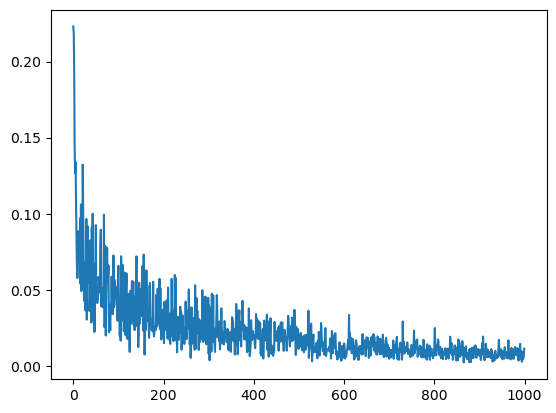

In [14]:
epochs = range(0,E)
loss = H.history['loss']
plt.plot(epochs,loss)

1/1 [==============================] - 1s 556ms/step


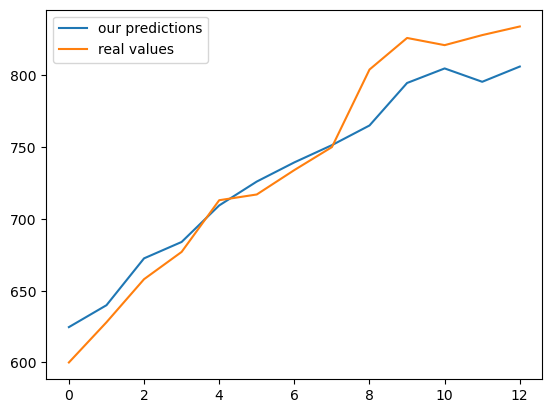

In [15]:
preds = scaler.inverse_transform(model.predict(train_data))
plt.plot(range(0,13),preds,label='our predictions')
plt.plot(range(0,13),scaler.inverse_transform(train_labels),label='real values')
plt.legend()

### Now we have trained our model which takes previous 12 month data as input and predicts next month milk production. We will carry forward this method and predict production for next whole year.

In [16]:
seed = array[-12:]
seed

array([[0.67548077],
       [0.55048077],
       [0.81490385],
       [0.84134615],
       [0.99278846],
       [0.92307692],
       [0.82451923],
       [0.73317308],
       [0.63461538],
       [0.65865385],
       [0.58653846],
       [0.69711538]])

In [17]:
seed.shape

(12, 1)

In [18]:
for _ in range(12):
    curr_12_months = seed[-12:]
    curr_12_months = np.squeeze(curr_12_months)
    curr_12_months = np.expand_dims(curr_12_months,0)
    curr_12_months = np.expand_dims(curr_12_months,0)
    pred = model.predict(curr_12_months)
    seed = np.append(seed,pred)

1/1 [==============================] - 0s 34ms/step


In [19]:
seed

array([0.67548077, 0.55048077, 0.81490385, 0.84134615, 0.99278846,
       0.92307692, 0.82451923, 0.73317308, 0.63461538, 0.65865385,
       0.58653846, 0.69711538, 0.62264603, 0.64247119, 0.65570271,
       0.67595088, 0.6775924 , 0.66826332, 0.65882409, 0.6456244 ,
       0.64723372, 0.63962382, 0.63971484, 0.63450128])

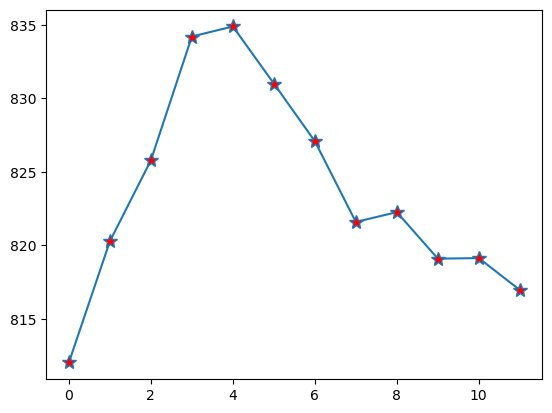

In [20]:
next_year_prediction = scaler.inverse_transform(seed[-12:].reshape(-1,1))
plt.plot(range(0,12),next_year_prediction,marker='*',markerfacecolor='red',markersize=10)